# Netflix Titles Analysis: Data Preprocessing, Clustering, and AutoML

In [11]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [63]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [17]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.loc[:,'date_added'] = df['date_added'].apply(lambda x: x.strip())
df.loc[:,"date"] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')
## add new features in the dataset
df['date_added']


df.loc[:,'year'] = df['date'].dt.year
df.loc[:,'month'] = df['date'].dt.month

df.loc[:,'season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else '0', axis = 1)
df.loc[:,'duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else '0', axis = 1)

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,year,month,season_count
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021-09-24,2021,9,0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021-09-24,2021,9,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021-09-24,2021,9,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,2021-09-23,2021,9,0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021-09-21,2021,9,0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gymnasiet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gymnasiet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


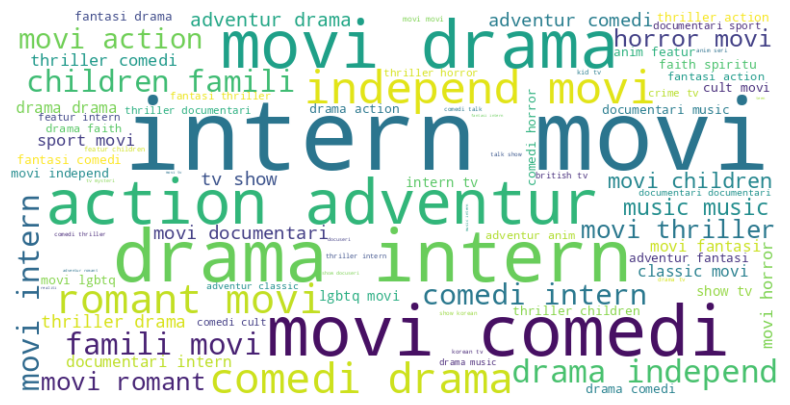

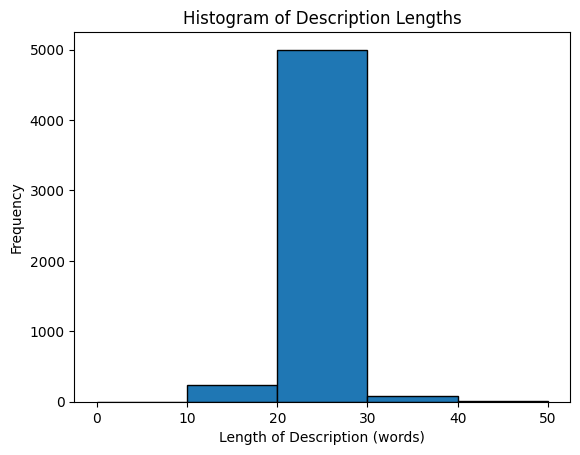

                              title  \
7                           Sankofa   
8     The Great British Baking Show   
9                      The Starling   
12                     Je Suis Karl   
24                            Jeans   
...                             ...   
8801                        Zinzana   
8802                         Zodiac   
8804                     Zombieland   
8805                           Zoom   
8806                         Zubaan   

                                             listed_in  \
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804     

7       drama independ movi intern movi
8            british tv show realiti tv
9                          comedi drama
12                    drama intern movi
24       comedi intern movi romant movi
                     ...               
8801         drama intern movi thriller
8802           cult movi drama thriller
8804                 comedi horror movi
8805        children famili movi comedi
8806      drama intern movi music music
Name: processed_description, Length: 5332, dtype: object

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
nltk.download('punkt')


# Preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens)

df['processed_description'] = df['listed_in'].apply(preprocess_text)

# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_description'])

# Display word cloud
text = ' '.join(df['processed_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Length of descriptions
df['description_length'] = df['description'].apply(lambda x: len(x.split()))

# Plot histogram of description lengths
plt.hist(df['description_length'], bins=range(0, max(df['description_length']) + 10, 10), edgecolor='black')
plt.xlabel('Length of Description (words)')
plt.ylabel('Frequency')
plt.title('Histogram of Description Lengths')
plt.show()

# Print processed DataFrame
print(df[['title', 'listed_in', 'processed_description']])
df['processed_description']


In [16]:
import matplotlib.pyplot as plt

def addlabels( x, y, Flag):
        if Flag:
            for index, value in enumerate(y):
                plt.text(x[index], value + 0.1, str(value), ha='center', va='bottom') 

def plot_histogram( x, y, color, xlabel, ylabel, title, rotation, Flag = False):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        addlabels(x,y,Flag)
        plt.xticks(x, rotation=rotation)
        plt.show()

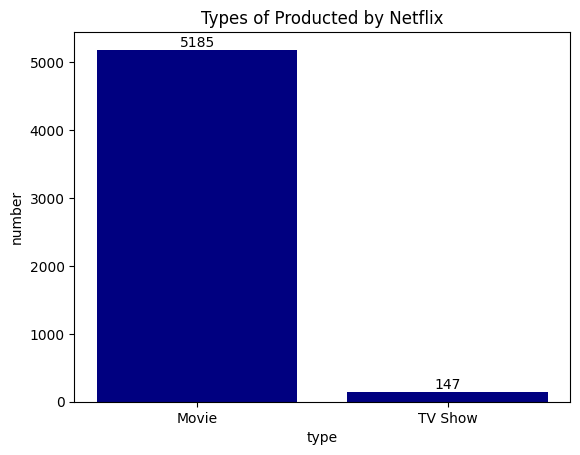

In [17]:
netflix_type = df['type'].value_counts()

plot_histogram( x = netflix_type.index,
                y = netflix_type.values,
                color = 'navy',
                xlabel = 'type', 
                ylabel = 'number', 
                title = 'Types of Producted by Netflix', 
                rotation = 0, 
                Flag = True)

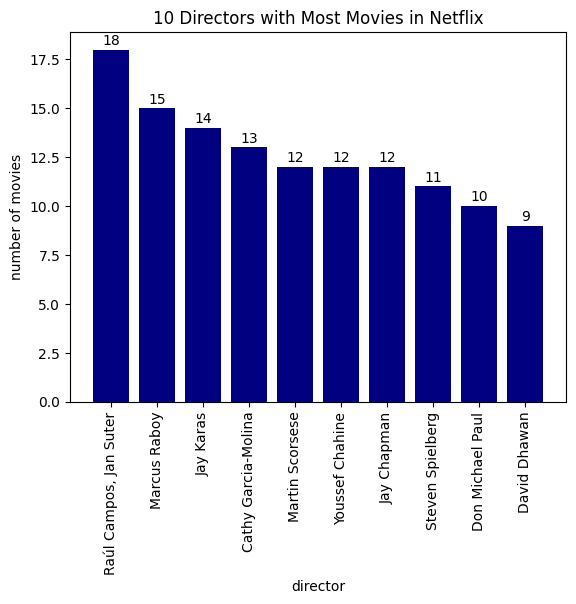

In [18]:
Netflix_director = df['director'].value_counts()

plot_histogram( x = Netflix_director.index[0:10],
                y = Netflix_director.values[0:10],
                color = 'navy',
                xlabel = 'director', 
                ylabel = 'number of movies', 
                title = '10 Directors with Most Movies in Netflix', 
                rotation = 90, 
                Flag = True)

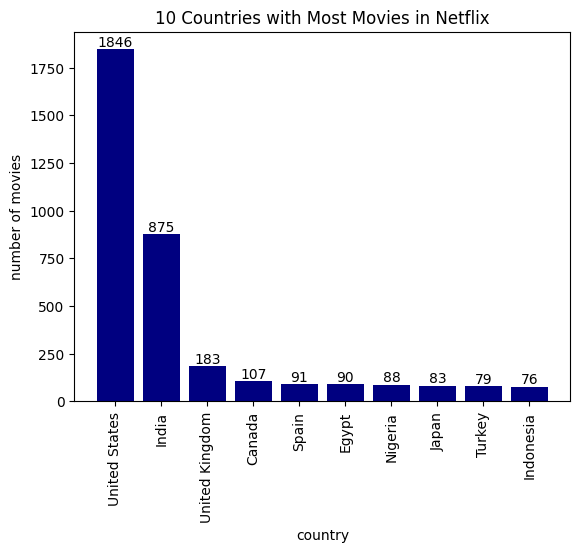

In [19]:
Netflix_country = df['country'].value_counts()
plot_histogram( x = Netflix_country.index[0:10],
                y = Netflix_country.values[0:10],
                color = 'navy',
                xlabel = 'country', 
                ylabel = 'number of movies', 
                title = '10 Countries with Most Movies in Netflix', 
                rotation = 90, 
                Flag = True)

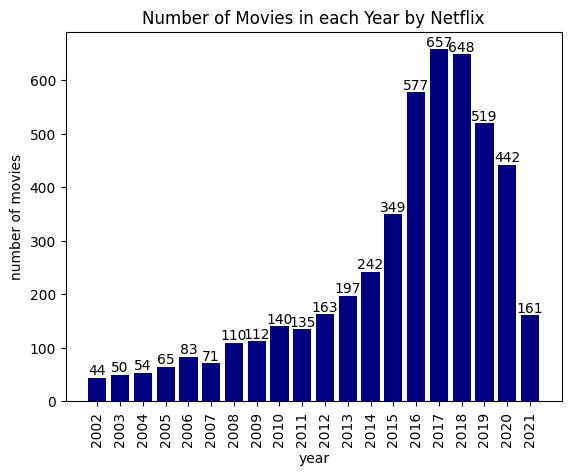

In [20]:
netflix_year = df['release_year'].value_counts()
plot_histogram( x = netflix_year.index[0:20],
                y = netflix_year.values[0:20],
                color = 'navy',
                xlabel = 'year', 
                ylabel = 'number of movies', 
                title = 'Number of Movies in each Year by Netflix', 
                rotation = 90, 
                Flag = True)

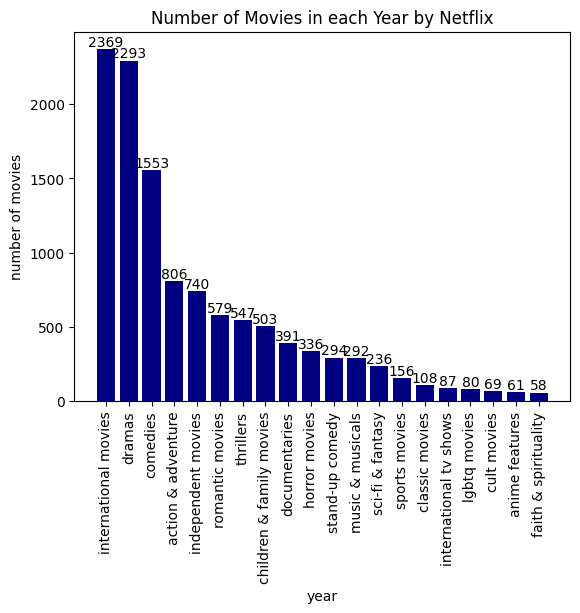

In [21]:
from collections import Counter

def extract_words(text):
    # Remove commas and split by space
    return [word.strip().lower() for word in text.split(',')]
df['word'] = df['listed_in'].apply(extract_words)
all_words = [word for sublist in df['word'] for word in sublist]


# Count the frequency of each word
word_counts = Counter(all_words)

sorted_items = sorted(word_counts.items(), key=lambda item: item[1], reverse = True)

# Convert sorted items back to a dictionary
sorted_dict = dict(sorted_items)

plot_histogram( x = list(sorted_dict.keys())[0:20],
                y = list(sorted_dict.values())[0:20],
                color = 'navy',
                xlabel = 'year', 
                ylabel = 'number of movies', 
                title = 'Number of Movies in each Year by Netflix', 
                rotation = 90, 
                Flag = True)






In [79]:
x=df['duration']

7       125
8          
9       104
12      127
24      166
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5332, dtype: object

In [22]:
df['duration'] = df['duration'].str.extract('(\d+)').astype(int)
netflix_data_encoded = pd.get_dummies(df, columns=['type', 'rating'])

In [25]:
netflix_data_encoded.head()

,show_id,title,director,cast,country,date_added,release_year,duration,listed_in,description,...,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
7,s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",536,"September 24, 2021",1993,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",...,False,False,False,False,True,False,False,False,False,False
8,s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",409,"September 24, 2021",2021,0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,...,False,False,True,False,False,False,False,False,False,False
9,s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",490,"September 24, 2021",2021,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,...,True,False,False,False,False,False,False,False,False,False
12,s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",167,"September 23, 2021",2021,127,"Dramas, International Movies",After most of her family is murdered in a terr...,...,False,False,False,False,True,False,False,False,False,False
24,s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",195,"September 21, 2021",1998,166,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,...,False,False,True,False,False,False,False,False,False,False


In [27]:
netflix_data_encoded.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description', 'date', 'year',
       'month', 'season_count', 'processed_description', 'description_length',
       'word', 'type_Movie', 'type_TV Show', 'rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14',
       'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y',
       'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object')

In [29]:
netflix_data_encoded = netflix_data_encoded.drop(['date_added'], axis=1)

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


netflix_data_encoded['country'] = netflix_data_encoded['country'].astype('category').cat.codes

scaler = StandardScaler()
netflix_data_scaled = scaler.fit_transform(netflix_data_encoded)

pca = PCA(n_components=2)
netflix_data_pca = pca.fit_transform(netflix_data_scaled)

ValueError: could not convert string to float: 's8'

c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Encoded DataFrame:
   type_Movie  type_TV Show  country_Canada  country_India  \
0         1.0           0.0             0.0            0.0   
1         0.0           1.0             0.0            1.0   
2         1.0           0.0             0.0            0.0   
3         0.0           1.0             1.0            0.0   

   country_United States  rating_G  rating_PG  rating_PG-13  rating_TV-MA  \
0                    1.0       0.0        0.0           1.0           0.0   
1                    0.0       0.0        0.0           0.0           1.0   
2                    1.0       0.0        1.0           0.0           0.0   
3                    0.0       1.0        0.0           0.0           0.0   

   release_year  
0          2021  
1          2020  
2          2019  
3          2018  
Standardized Features:
[[ 1.         -1.         -0.57735027 -0.57735027  1.         -0.57735027
  -0.57735027  1.73205081 -0.57735027  1.34164079]
 [-1.          1.         -0.57735027  1.73205

c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with Clusters:
        PC1       PC2  cluster
0 -2.569613  0.318097        0
1  1.794183  2.676835        1
2 -1.952341 -0.894026        0
3  2.727771 -2.100906        1
        PC1       PC2  cluster
0 -2.569613  0.318097        0
1  1.794183  2.676835        1
2 -1.952341 -0.894026        0
3  2.727771 -2.100906        1


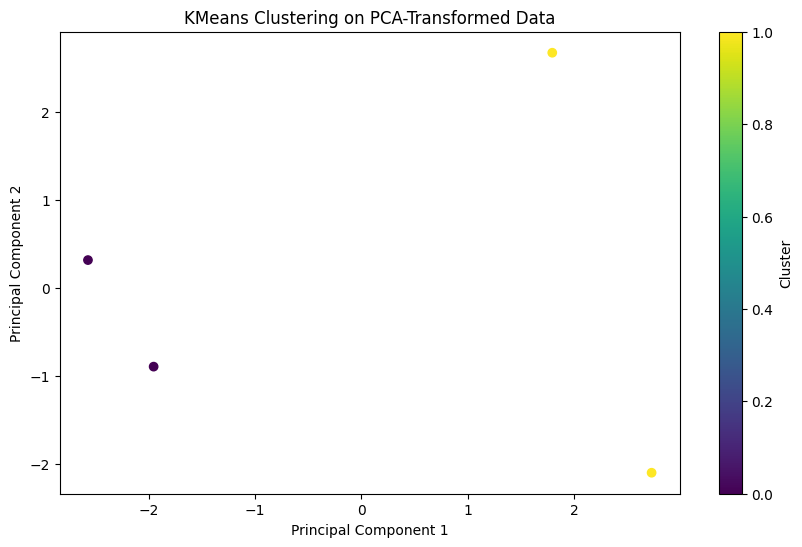

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual dataset)
data = {
    'type': ['Movie', 'TV Show', 'Movie', 'TV Show'],
    'country': ['United States', 'India', 'United States', 'Canada'],
    'release_date': ['2021-07-01', '2020-12-12', '2019-05-15', '2018-08-10'],
    'rating': ['PG-13', 'TV-MA', 'PG', 'G']
}
df = pd.DataFrame(data)

# Convert 'release_date' to datetime and extract the year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df = df.drop(columns=['release_date'])

# OneHotEncode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['type', 'country', 'rating']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['type', 'country', 'rating']))

# Combine the encoded features with 'release_year'
df_processed = pd.concat([encoded_df, df[['release_year']]], axis=1)

# Debug: Print intermediate results
print("Encoded DataFrame:")
print(df_processed.head())

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_processed)

# Debug: Print intermediate results
print("Standardized Features:")
print(features_scaled)

# Apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Debug: Print intermediate results
print("PCA Features:")
print(features_pca)

# Add PCA results to DataFrame
df_pca = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(features_pca)

# Debug: Print final DataFrame with clusters
print("DataFrame with Clusters:")
print(df_pca)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()


In [38]:
pip install threadpoolctl==3.1.0


  Obtaining dependency information for threadpoolctl==3.1.0 from https://files.pythonhosted.org/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl.metadata
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Sample DataFrame (Replace this with your actual dataset)
data = {
    'type': ['Movie', 'TV Show', 'Movie', 'TV Show'],
    'country': ['United States', 'India', 'United States', 'Canada'],
    'release_date': ['2021-07-01', '2020-12-12', '2019-05-15', '2018-08-10']
}
df = pd.DataFrame(data)

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract year from 'release_date'
df['release_year'] = df['release_date'].dt.year

# Drop the original 'release_date' column
df = df.drop(columns=['release_date'])

# OneHotEncode categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['type', 'country']])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['type', 'country']))

# Combine the encoded features with 'release_year'
df_processed = pd.concat([encoded_df, df[['release_year']]], axis=1)

# Debug: Print intermediate results
print("Encoded DataFrame:")
print(df_processed.head())

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_processed)

# Debug: Print intermediate results
print("Standardized Features:")
print(features_scaled)

# Apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Debug: Print intermediate results
print("PCA Features:")
print(features_pca)

# Add PCA results to DataFrame
df_pca = pd.DataFrame(features_pca, columns=['PC1', 'PC2'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(features_pca)

# Debug: Print final DataFrame with clusters
print("DataFrame with Clusters:")
print(df_pca)

# Plot the clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()




c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Encoded DataFrame:
   type_Movie  type_TV Show  country_Canada  country_India  \
0         1.0           0.0             0.0            0.0   
1         0.0           1.0             0.0            1.0   
2         1.0           0.0             0.0            0.0   
3         0.0           1.0             1.0            0.0   

   country_United States  release_year  
0                    1.0          2021  
1                    0.0          2020  
2                    1.0          2019  
3                    0.0          2018  
Standardized Features:
[[ 1.         -1.         -0.57735027 -0.57735027  1.          1.34164079]
 [-1.          1.         -0.57735027  1.73205081 -1.          0.4472136 ]
 [ 1.         -1.         -0.57735027 -0.57735027  1.         -0.4472136 ]
 [-1.          1.          1.73205081 -0.57735027 -1.         -1.34164079]]
PCA Features:
[[-2.22078775  0.2407133 ]
 [ 1.55062266  2.02564074]
 [-1.68731046 -0.67653591]
 [ 2.35747556 -1.58981813]]


AttributeError: 'NoneType' object has no attribute 'split'

In [37]:
df['duration'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform categorical features
type_encoded = encoder.fit_transform(df[['type']])
country_encoded = encoder.transform(df[['country']])

# Convert encoded features to DataFrame
type_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['type']))
country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['country']))

# Concatenate with original DataFrame and drop original categorical columns
df = pd.concat([df, type_df, country_df], axis=1).drop(['type', 'country'], axis=1)


c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- country
Feature names seen at fit time, yet now missing:
- type


In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
netflix_data_encoded = pd.get_dummies(df, columns=['type', 'rating'])

netflix_data_encoded['country'] = netflix_data_encoded['country'].astype('category').cat.codes
scaler = StandardScaler()
netflix_data_scaled = scaler.fit_transform(netflix_data_encoded)
pca = PCA(n_components=2)
netflix_data_pca = pca.fit_transform(netflix_data_scaled)

In [61]:
netflix_data_scaled

array([[ 0.90453403,  0.4472136 ,  1.        , -0.57735027, -0.57735027,
        -0.57735027, -0.57735027, -0.57735027,  1.73205081],
       [-0.30151134, -1.34164079, -1.        ,  1.73205081, -0.57735027,
        -0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [ 0.90453403, -0.4472136 ,  1.        , -0.57735027, -0.57735027,
        -0.57735027, -0.57735027,  1.73205081, -0.57735027],
       [-1.50755672,  1.34164079, -1.        , -0.57735027,  1.73205081,
         1.73205081, -0.57735027, -0.57735027, -0.57735027]])

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(netflix_data_pca)

c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [55]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

# Sample DataFrame
data = {
    'type': ['Action', 'Comedy', 'Action', 'Drama'],
    'country': ['USA', 'UK', 'USA', 'Canada'],
    'rating': [5, 3, 4, 2],
    'release_year': [2020, 2018, 2019, 2021]
}
df = pd.DataFrame(data)

# One-Hot Encode Categorical Features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
categorical_features = df[['type', 'country']]
encoded_features = encoder.fit_transform(categorical_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

# Concatenate with numerical features
df_numerical = df[['rating', 'release_year']]
df_processed = pd.concat([df_numerical, encoded_df], axis=1)

# Standardize Numerical Features
scaler = StandardScaler()
df_processed[['rating', 'release_year']] = scaler.fit_transform(df_processed[['rating', 'release_year']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_processed['cluster'] = kmeans.fit_predict(df_processed)

print(df_processed)




c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Apply one-hot encoding to 'type' and 'country'
type_encoded = encoder.fit_transform(df[['type']])
country_encoded = encoder.fit_transform(df[['country']])
rating_encoded = encoder.fit_transform(df[['rating']])


# Convert encoded features to DataFrame
type_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['type']))
country_df = pd.DataFrame(country_encoded, columns=encoder.get_feature_names_out(['country']))
rating_df = pd.DataFrame(rating_encoded, columns=encoder.get_feature_names_out(['rating']))

# Concatenate with original DataFrame
df = pd.concat([df, type_df, country_df,rating_df], axis=1).drop(['type', 'country','rating'], axis=1)

c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Gymnasiet\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


KeyboardInterrupt: 

In [43]:
print(type(X))

<class 'scipy.sparse._csr.csr_matrix'>


In [42]:
from sklearn.cluster import KMeans
import numpy as np

# Determine the number of clusters (k). Here, we choose k=5 for illustration.
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-Means model
kmeans.fit(X)

# Get cluster labels
df['cluster'] = kmeans.labels_

print(df.head())  # Display first few rows with cluster labels

# Optionally, get the cluster centers
print("Cluster centers:\n", kmeans.cluster_centers_)

AttributeError: 'NoneType' object has no attribute 'split'